# **Introduction:**

---

✍
We were asked to explore, research and anylyze a data set of our own choice. We both wanted a data set with a touch of everyday life, that would be both interesting and challenging. Our hopes came true - The dataset, named The Employment Scam Aegean Dataset (EMSCAD) was sure an intresting one, and most definitely, a challenging one. Our knowledge on the subject has increased significantly, so we can surely say our data mining skills have improved.
We hope we could pass some of the knowledge to you, and we hope you'll enjoy it.
We did. 



Hodaya Moshayev and Zohar Klimovsky. 

In [1]:
import os

data_path = ['data']

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




---

*The dataset, named The Employment Scam Aegean Dataset (**EMSCAD**) by researchers of University of the Aegean, consists of 17,800 job ads posted between 2012 to 2014 through Workable, a recruiting software, whose 866 fraudulent job ads were manually annotated by employees of Workable. The criteria of inclusion is said to be including "client’s suspicious activity on the system, false contact or company information, candidate complaints and periodic meticulous analysis of the clientele". So on one hand there may be a small number of mislabeled job ads, on the other hand the annotation may include factors not contained in the dataset.*





In [3]:
import pandas as pd
import numpy as np

filepath = '/content/gdrive/MyDrive/ML_DM/fake_job_postings.csv'
data = pd.read_csv(filepath, sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

---


### *The dataset includes structured and unstructured data of 18 columns as described below : ↪*

***String Data***

1. Title: The job advertisement header
2. Location: The location of the job adviser
3. Department: Job relevant department like sales
4. Salary range: Suggested Salary Range 

***Free-Style Text***

1. Company Profile: A brief description of the company
2. Description: Advertised Job details
3. Requirement: Required list for job
4. Benefits: Benefits list offered by employer

***Binary***

1. Telecommuting: True for Telecommuting positions
2. Company Logo: True if company logo exists
3. Questions: True if screening question exists
4. Fraudulent: Classification attribute (Target)

***Nominal***

1. Employment Type: Full-type, Part-time, Contract, etc.
2. Required Experience: Executive, Entry level, Intern, etc.
3. Required Education: Doctorate, Master’s Degree, Bachelor’s, etc.
4. Industry: Automotive, IT, Health care, Real estate, etc.
5. Function: Consulting, Engineering, Research, Sales etc.


---




In [4]:
data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
data = data.drop(columns = ["job_id"]) #we drop this to avoid overfitting from the start. 

#filling null values, 'Not Applicable' ,'Unspecified' with 'Empty' for data cleaning
data.fillna('Empty', inplace=True)
data = data.replace(['Not Applicable','Unspecified'],'Empty')

In [5]:
#Label counts for each attribute so we can undrstand how to transform the needed columns
labelcountlist = []
for x in data.columns:
        labelcountlist.append((len(data[x].unique())))
labelcount = pd.DataFrame({'Attribute': data.columns, 'Count': labelcountlist})
print(labelcount)


              Attribute  Count
0                 title  11231
1              location   3106
2            department   1338
3          salary_range    875
4       company_profile   1710
5           description  14802
6          requirements  11967
7              benefits   6205
8         telecommuting      2
9      has_company_logo      2
10        has_questions      2
11      employment_type      6
12  required_experience      7
13   required_education     13
14             industry    132
15             function     38
16           fraudulent      2




---

Now, we would like to start examine the data and see whether there exist a correlation between some of the columns to our target column ('fraudulent'). 
However, in order to do that, we need to remove ✂ all the free-style-text columns  (which will be later explored) and numerically encode all the nominal-data columns. For that, we'll use the LabelEncoder method in Python which translate the data in an alpha-beta numeric way.






In [6]:
from sklearn import preprocessing

string_labels = ['company_profile','description','requirements','benefits']

data_without_text_col = data.copy() # we copy the data for convenience
data_without_text_col = data_without_text_col.drop(string_labels, axis=1)
le = preprocessing.LabelEncoder()
#ASSIGNS NUMBER TO EVERY LABEL
for i in data_without_text_col.columns:
    le.fit(data_without_text_col[i])
    data_without_text_col[i]=le.transform(data_without_text_col[i])

In [ ]:
data_without_text_col.head()


title  location  department  salary_range  telecommuting  has_company_logo  \
0   6043      2536         759           874              0                 1   
1   2183      1074        1162           874              0                 1   
2   1763      1868         429           874              0                 1   
3    299      1704        1055           874              0                 1   
4    975      1742         429           874              0                 1   

   has_questions  employment_type  required_experience  required_education  \
0              0                3                    5                   4   
1              0                2                    2                   4   
2              0                1                    2                   4   
3              0                2                    6                   1   
4              1                2                    6                   1   

   industry  function  fraudulent  
0        33        23           0  
1        76         7           0  
2        33        12           0  
3        22        32           0  
4        52        17           0

---

*Checking Correlations...* 📋




In [7]:
y = data['fraudulent']
fields = list(data_without_text_col.columns[:-1])  # everything except "fraud"
correlations = data_without_text_col[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

has_company_logo      -0.261971
function              -0.095212
has_questions         -0.091627
salary_range          -0.050201
department            -0.042236
title                 -0.041619
required_experience   -0.015803
employment_type        0.009486
industry               0.023889
telecommuting          0.034523
location               0.091802
required_education     0.094120
dtype: float64

---


*As we can see, this method hadn't showen very good results.
 However, to be sure, we'll use the pairplot method.*




In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

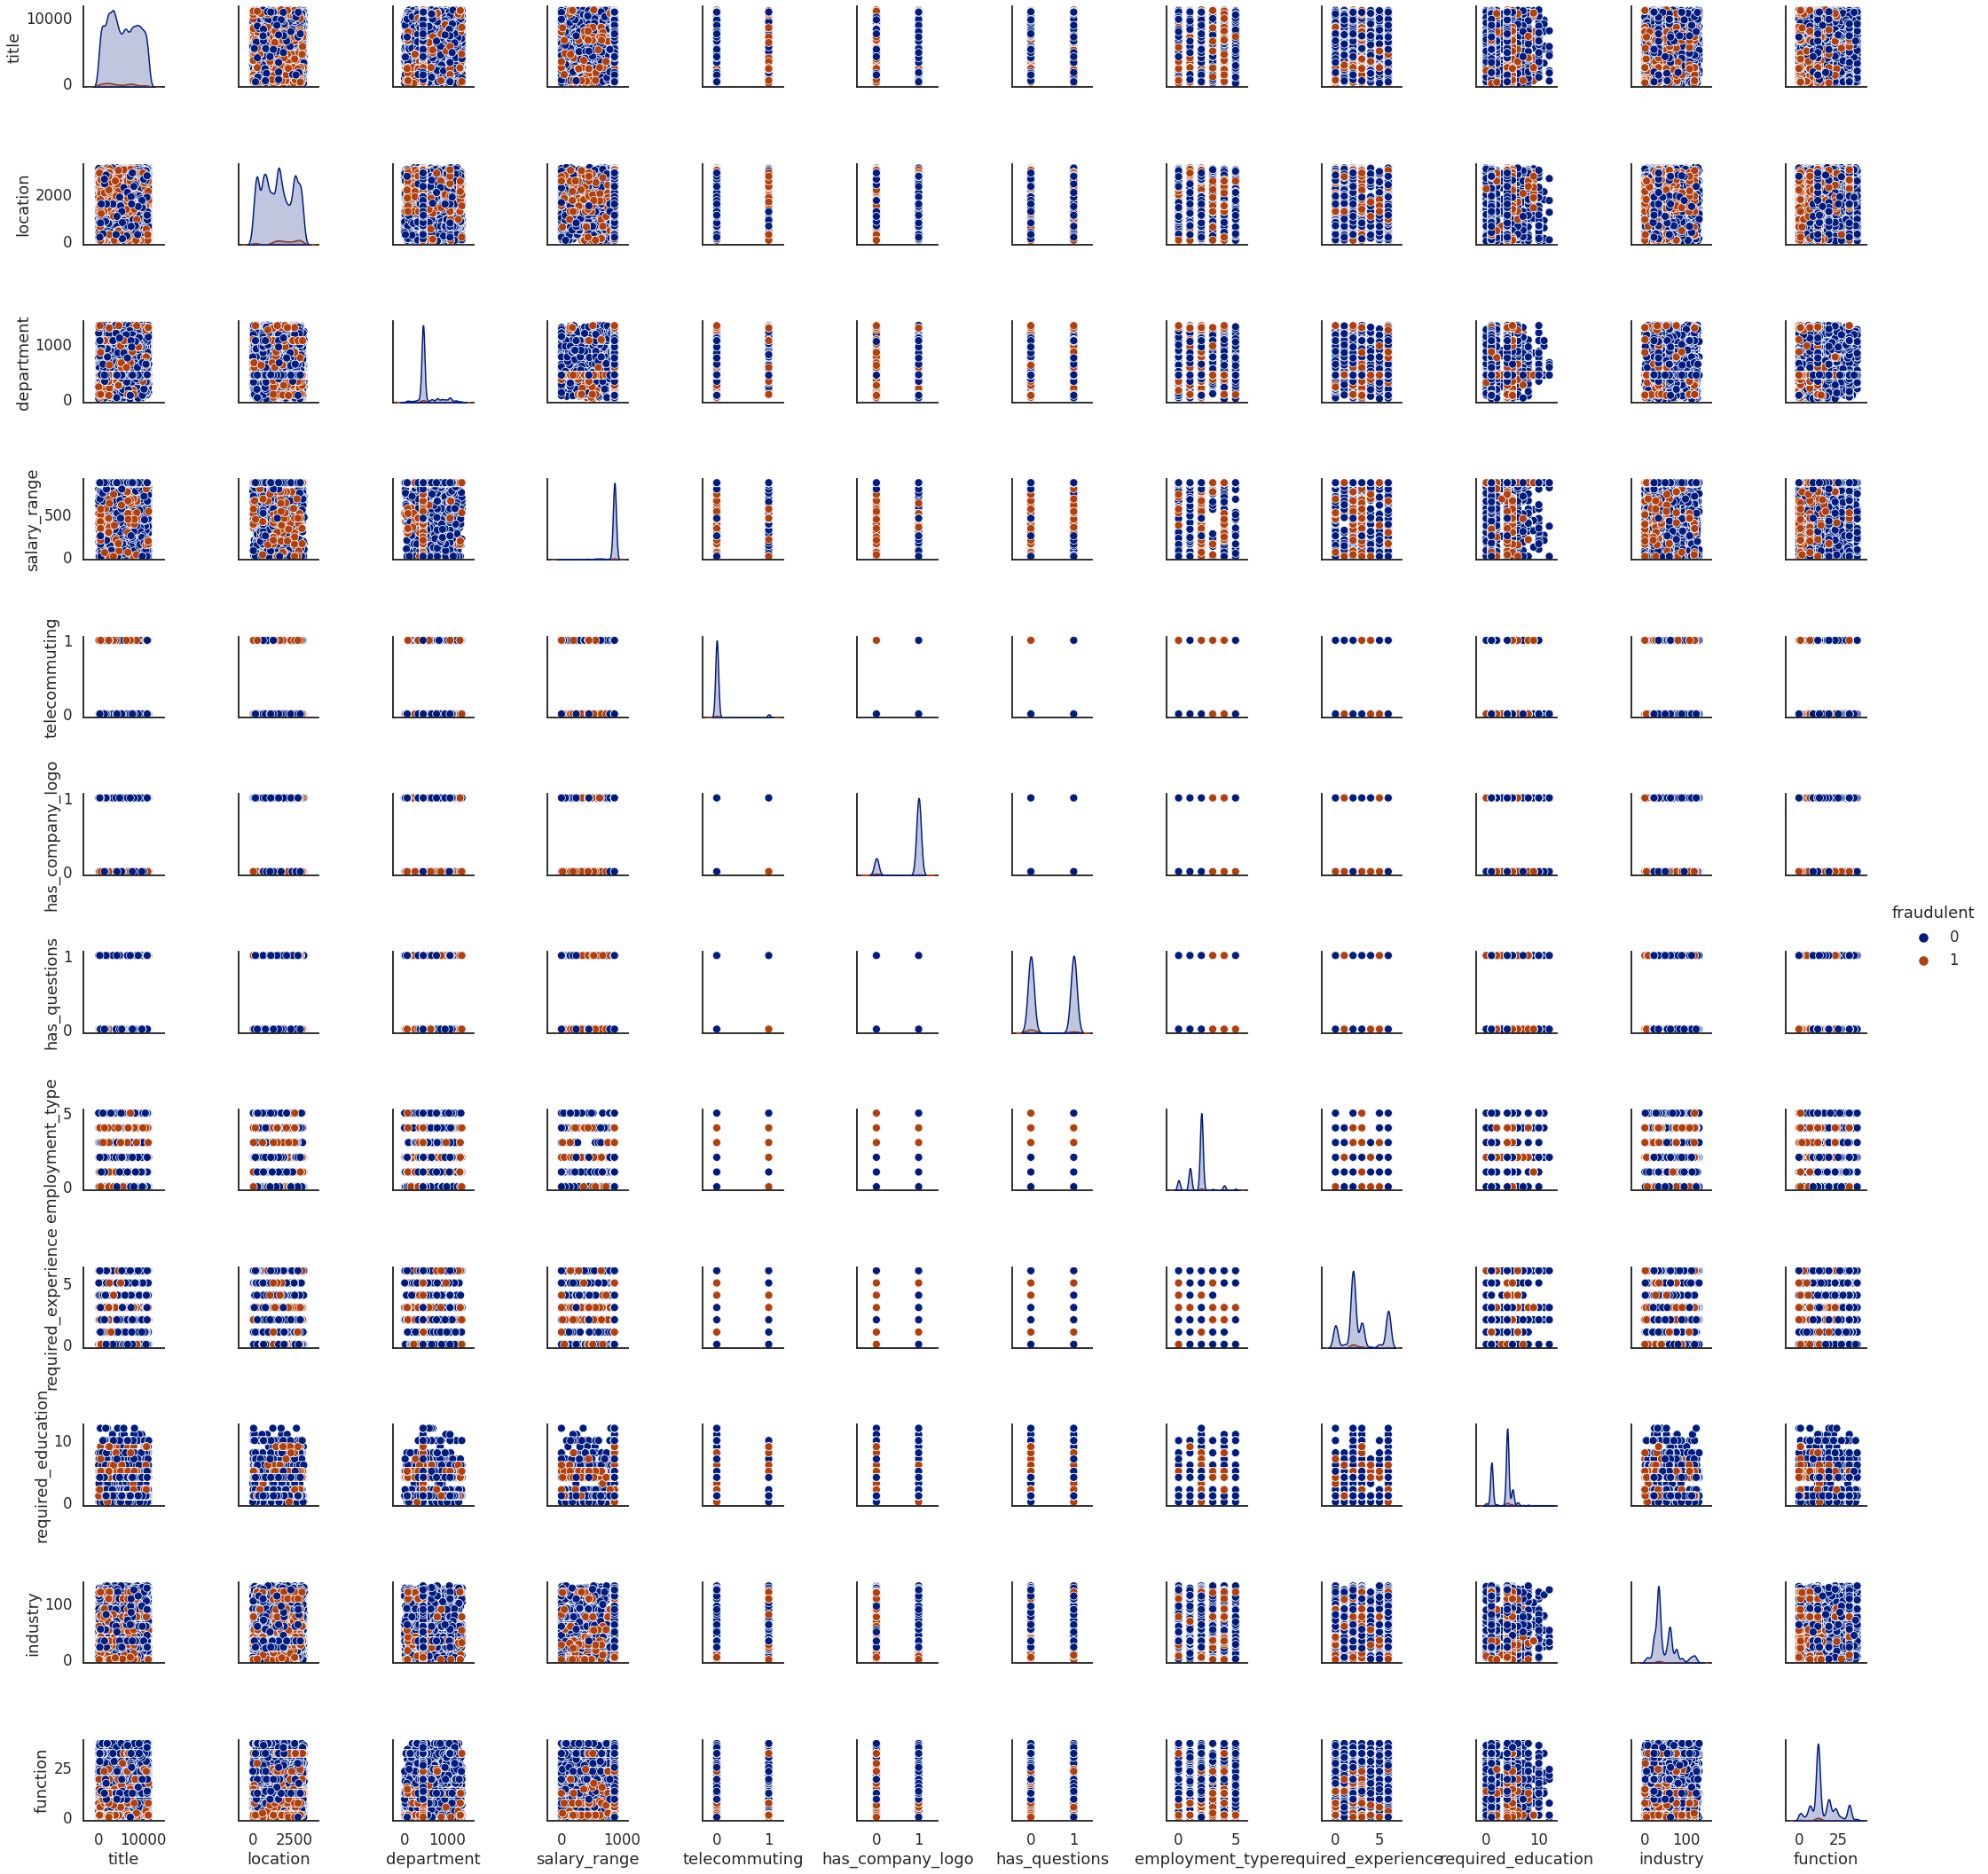

In [ ]:
sns.pairplot(data_without_text_col, hue='fraudulent')



---
*We can notice that each of the graphs above shows that there isn't a  clear classification method we can apply directly between all 2 different variables.
\
 Our conclusion:
  \
  A different method should be tried.*
  

---




## **Imbalanced Data Set**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


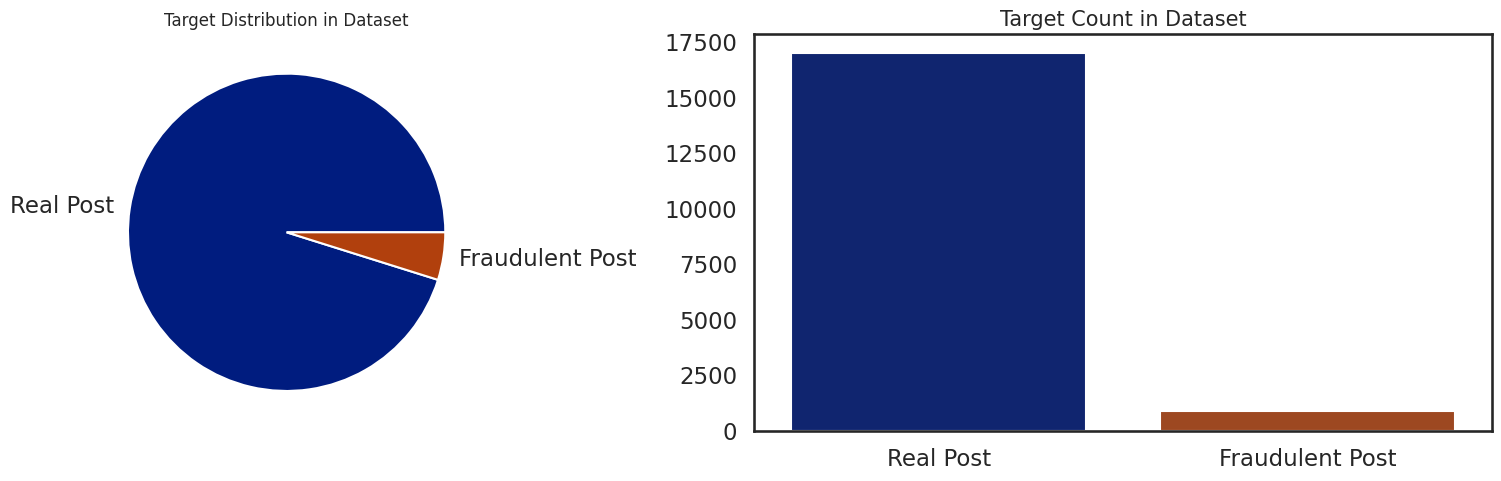

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

data["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post', 'Fraudulent Post'])
temp = data["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post", "Fraudulent Post"])

axes[0].set_title('Target Distribution in Dataset', fontsize=12)
axes[1].set_title('Target Count in Dataset', fontsize=15)

plt.show()



---


As we can see, our data set is highly imbalanced. In order to handle with this issue, we will use the **Oversampling** method. It is the process of generating synthetic data that tries to randomly generate a sample off the attributes from observations in the minority class. There are number of methods that can be used, but we chose a common technique named **resample**.

In [10]:
from sklearn.utils import resample

real = data[data.fraudulent==0]
fake = data[data.fraudulent==1]
data_resample = resample(fake, replace=True, n_samples=17000, random_state=123)
data_balanced = pd.concat([real, data_resample])

X=data_balanced.drop(['fraudulent'],axis=1)
Y=data_balanced["fraudulent"]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


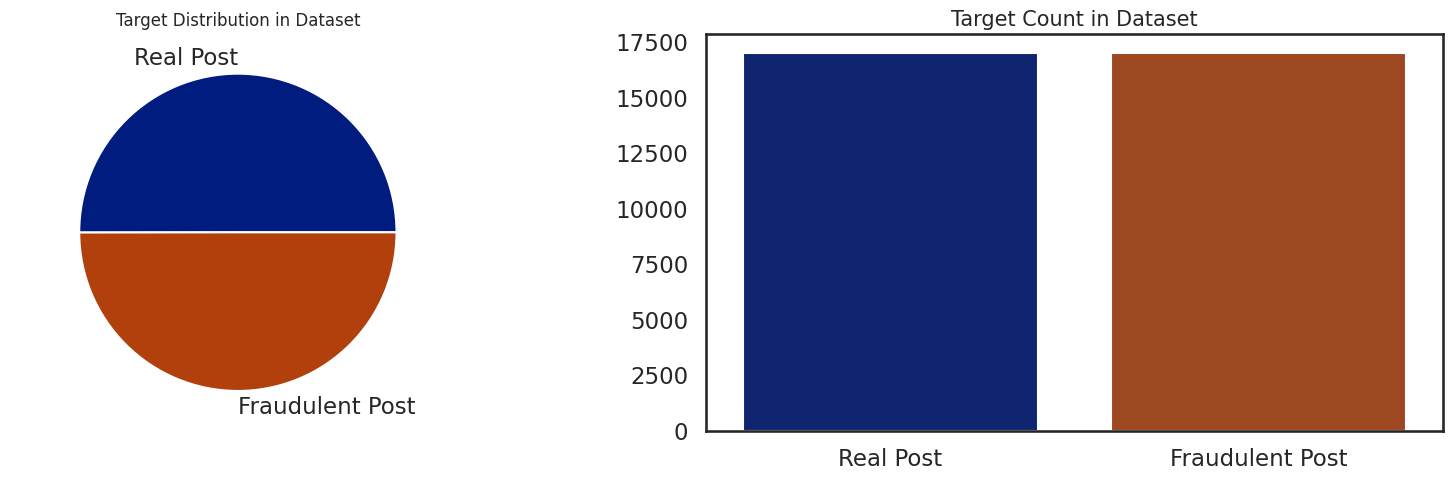

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(17, 5), dpi=100)
plt.tight_layout()

data_balanced["fraudulent"].value_counts().plot(kind='pie', ax=axes[0], labels=['Real Post', 'Fraudulent Post'])
temp = data_balanced["fraudulent"].value_counts()
sns.barplot(temp.index, temp, ax=axes[1])

axes[0].set_ylabel(' ')
axes[1].set_ylabel(' ')
axes[1].set_xticklabels(["Real Post", "Fraudulent Post"])

axes[0].set_title('Target Distribution in Dataset', fontsize=12)
axes[1].set_title('Target Count in Dataset', fontsize=15)

plt.show()

 ⚡  We can see clearly our dataset is now balanced ❕ 
\
We would like to check the correlation now 

In [12]:
le = preprocessing.LabelEncoder()
data1 = data.copy()
#ASSIGNS NUMBER TO EVERY LABEL
for i in data1.columns:
    le.fit(data1[i])
    data1[i]=le.transform(data1[i])

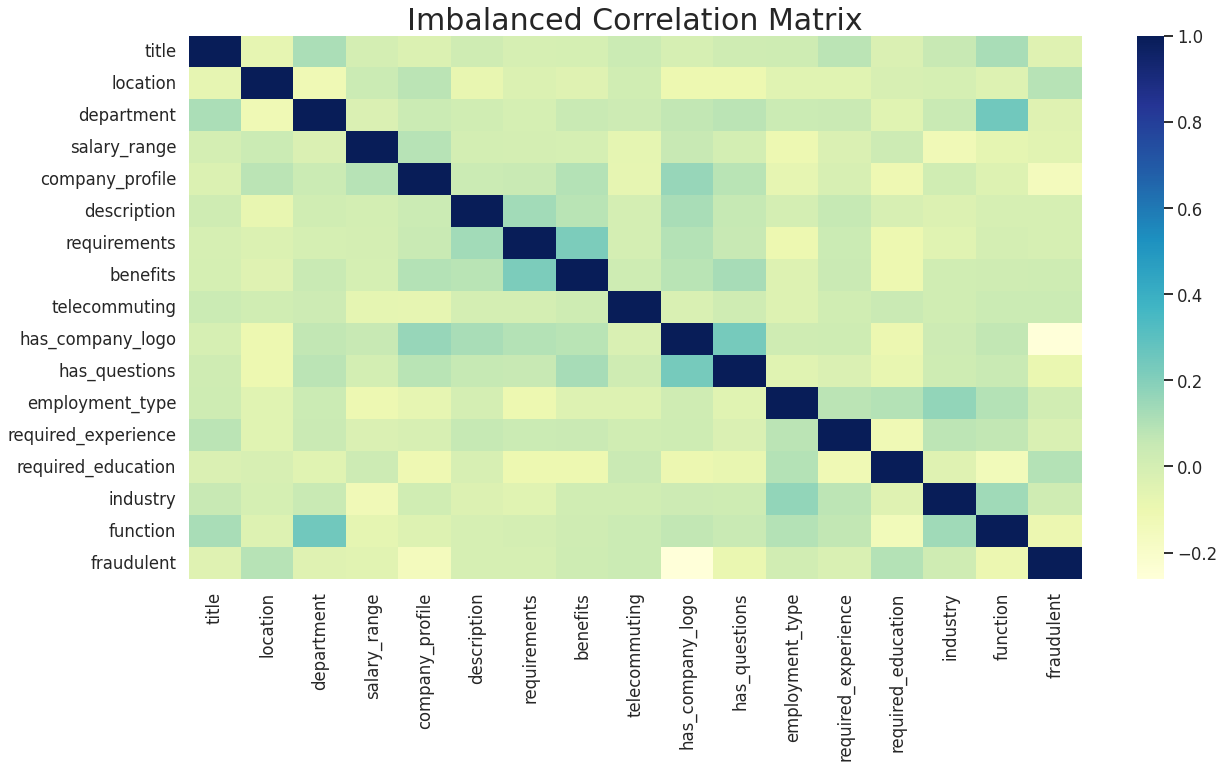

In [13]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = data1.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=30)

plt.show()

In [14]:
le = preprocessing.LabelEncoder()
#ASSIGNS NUMBER TO EVERY LABEL
for i in data_balanced.columns:
    le.fit(data_balanced[i])
    data_balanced[i]=le.transform(data_balanced[i])

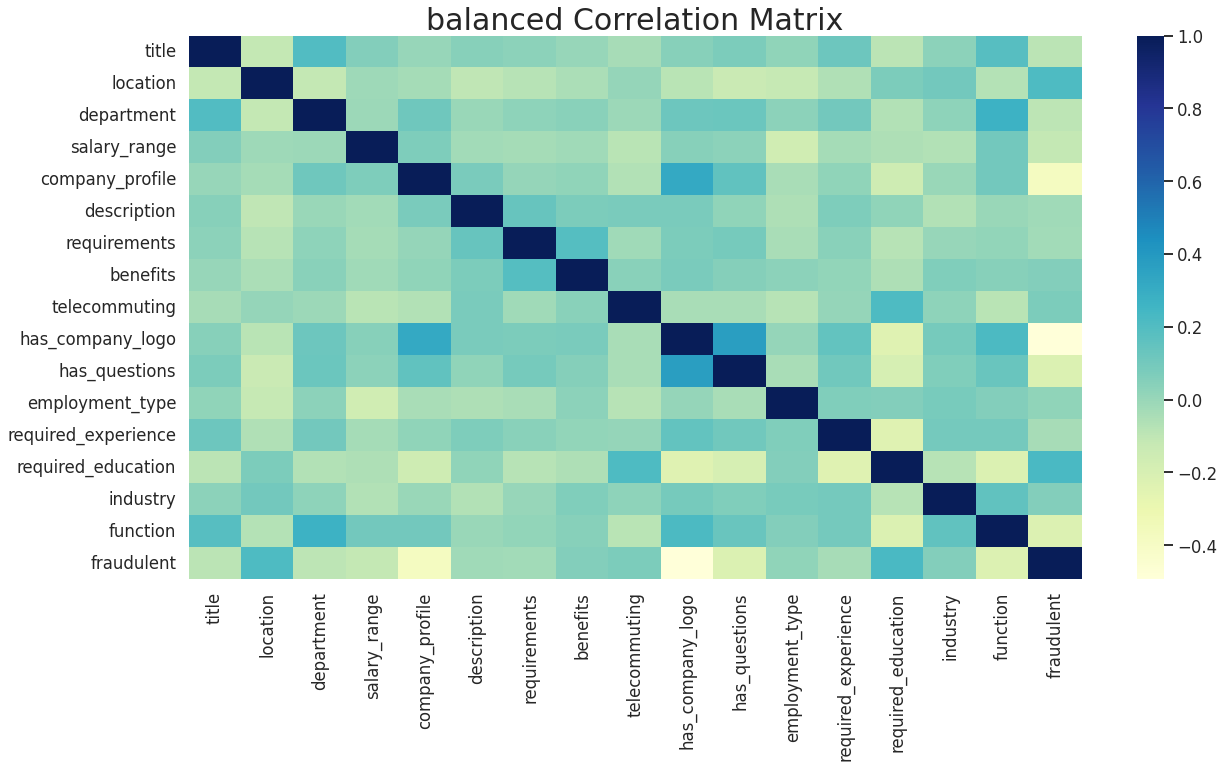

In [15]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = data_balanced.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("balanced Correlation Matrix", fontsize=30)

plt.show()



---


We can see there is an improvement in findind correlation.\
However, there isn't a strong correlation, so another method should be performed ☹


---



# ✨ ***DEALING WITH TEXT COLUMNS***




*Our next step is to explore the free-style-txet columns.
\
At first, we'll start with a very simple method - measure the text's length*


---
⚡⚡⚡⚡⚡




### **Length of Text Fields**

*Examine the length of text fields in real and fake ads.*

In [16]:
data['company_profile_length']=data.apply(lambda row: len(row.company_profile), axis=1)
data['description_length']=data.apply(lambda row: len(row.description), axis=1)
data['requirements_length']=data.apply(lambda row: len(row.requirements), axis=1)
data['benefits_length']=data.apply(lambda row: len(row.benefits), axis=1)
data['total_text_length']=data['company_profile_length']+data['description_length']+data['requirements_length']+data['benefits_length']

In [ ]:
data.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever      Empty   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth      Empty   

  salary_range                                    company_profile  \
0        Empty  We're Food52, and we've created a groundbreaki...   
1        Empty  90 Seconds, the worlds Cloud Video Production ...   
2        Empty  Valor Services provides Workforce Solutions th...   
3        Empty  Our passion for improving quality of life thro...   
4        Empty  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                              Empty              0   
1  What you will get from usThrough being part of...              0   
2                                              Empty              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  ...  required_experience required_education  \
0                 1  ...           Internship              Empty   
1                 1  ...                Empty              Empty   
2                 1  ...                Empty              Empty   
3                 1  ...     Mid-Senior level  Bachelor's Degree   
4                 1  ...     Mid-Senior level  Bachelor's Degree   

                    industry              function fraudulent  \
0                      Empty             Marketing          0   
1  Marketing and Advertising      Customer Service          0   
2                      Empty                 Empty          0   
3          Computer Software                 Sales          0   
4     Hospital & Health Care  Health Care Provider          0   

  company_profile_length  description_length  requirements_length  \
0                    885                 905                  852   
1                   1286                2077                 1433   
2                    879                 355                 1363   
3                    614                2600                 1429   
4                   1628                1520                  757   

   benefits_length  total_text_length  
0                5               2647  
1             1292               6088  
2                5               2602  
3              782               5425  
4               21               3926  

[5 rows x 22 columns]

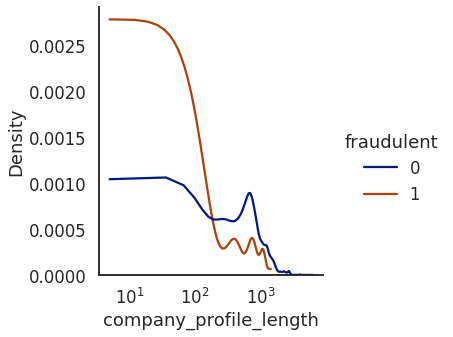

In [17]:
ax=sns.displot(data, x='company_profile_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

 In here, we can see clearly that fake jobs have shorter description of their company profile compared to real jobs.✅


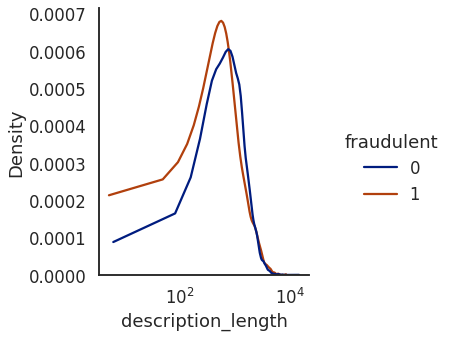

In [ ]:
ax=sns.displot(data, x='description_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

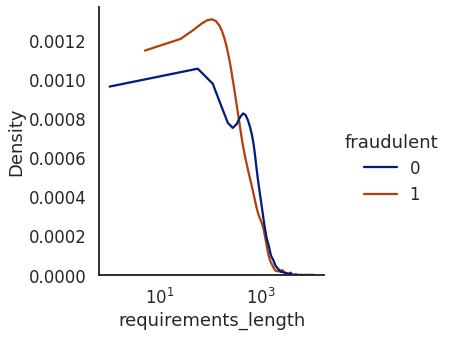

In [ ]:
ax=sns.displot(data, x='requirements_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

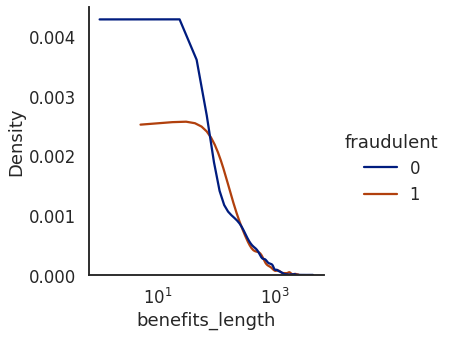

In [ ]:
ax=sns.displot(data, x='benefits_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

However, in the description of the benefits there isn't much of a difference between fake and real jobs. In average, there is more probability for fake jobs to have shorther description of the benefits, however, it is rather small probablity in the sum. *** לערוך!

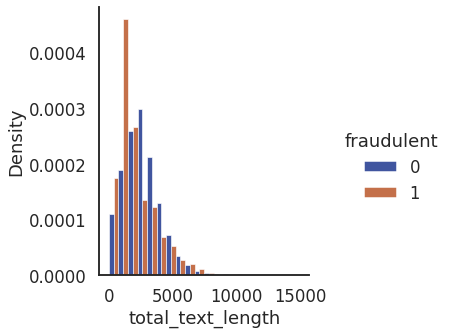

In [ ]:
sns.displot(data, x='total_text_length', hue='fraudulent', stat='density', bins=20, common_norm=False, multiple='dodge')

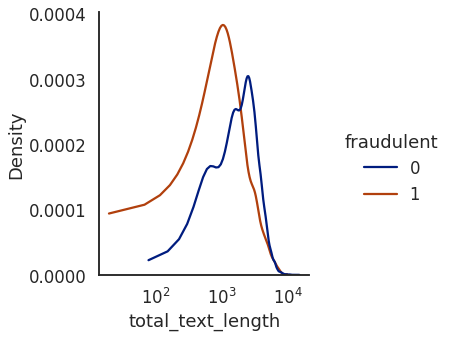

In [ ]:
ax=sns.displot(data, x='total_text_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")
  

### **Conclusion!** 🙌
*We can clearly see that fake job posts have in general less textual content.*



---


⭐⭐⭐⭐⭐

# **Natural Language Processing**

Until now, our focus on the text-columns was on their length. In this section we focus on their Content. We want to check whether specific words appear more
frequently in the fake compare to the real, and vice versa.



In [18]:
import nltk
import time
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

ps=PorterStemmer()

In [19]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
string_labels = ['company_profile','description','requirements','benefits']
new_strings_real = {}
new_strings_fake = {}
for label in string_labels:
  new_strings_real[label]=data[label].loc[data['fraudulent']==0].apply(transform_text)
  new_strings_fake[label]=data[label].loc[data['fraudulent']==1].apply(transform_text)

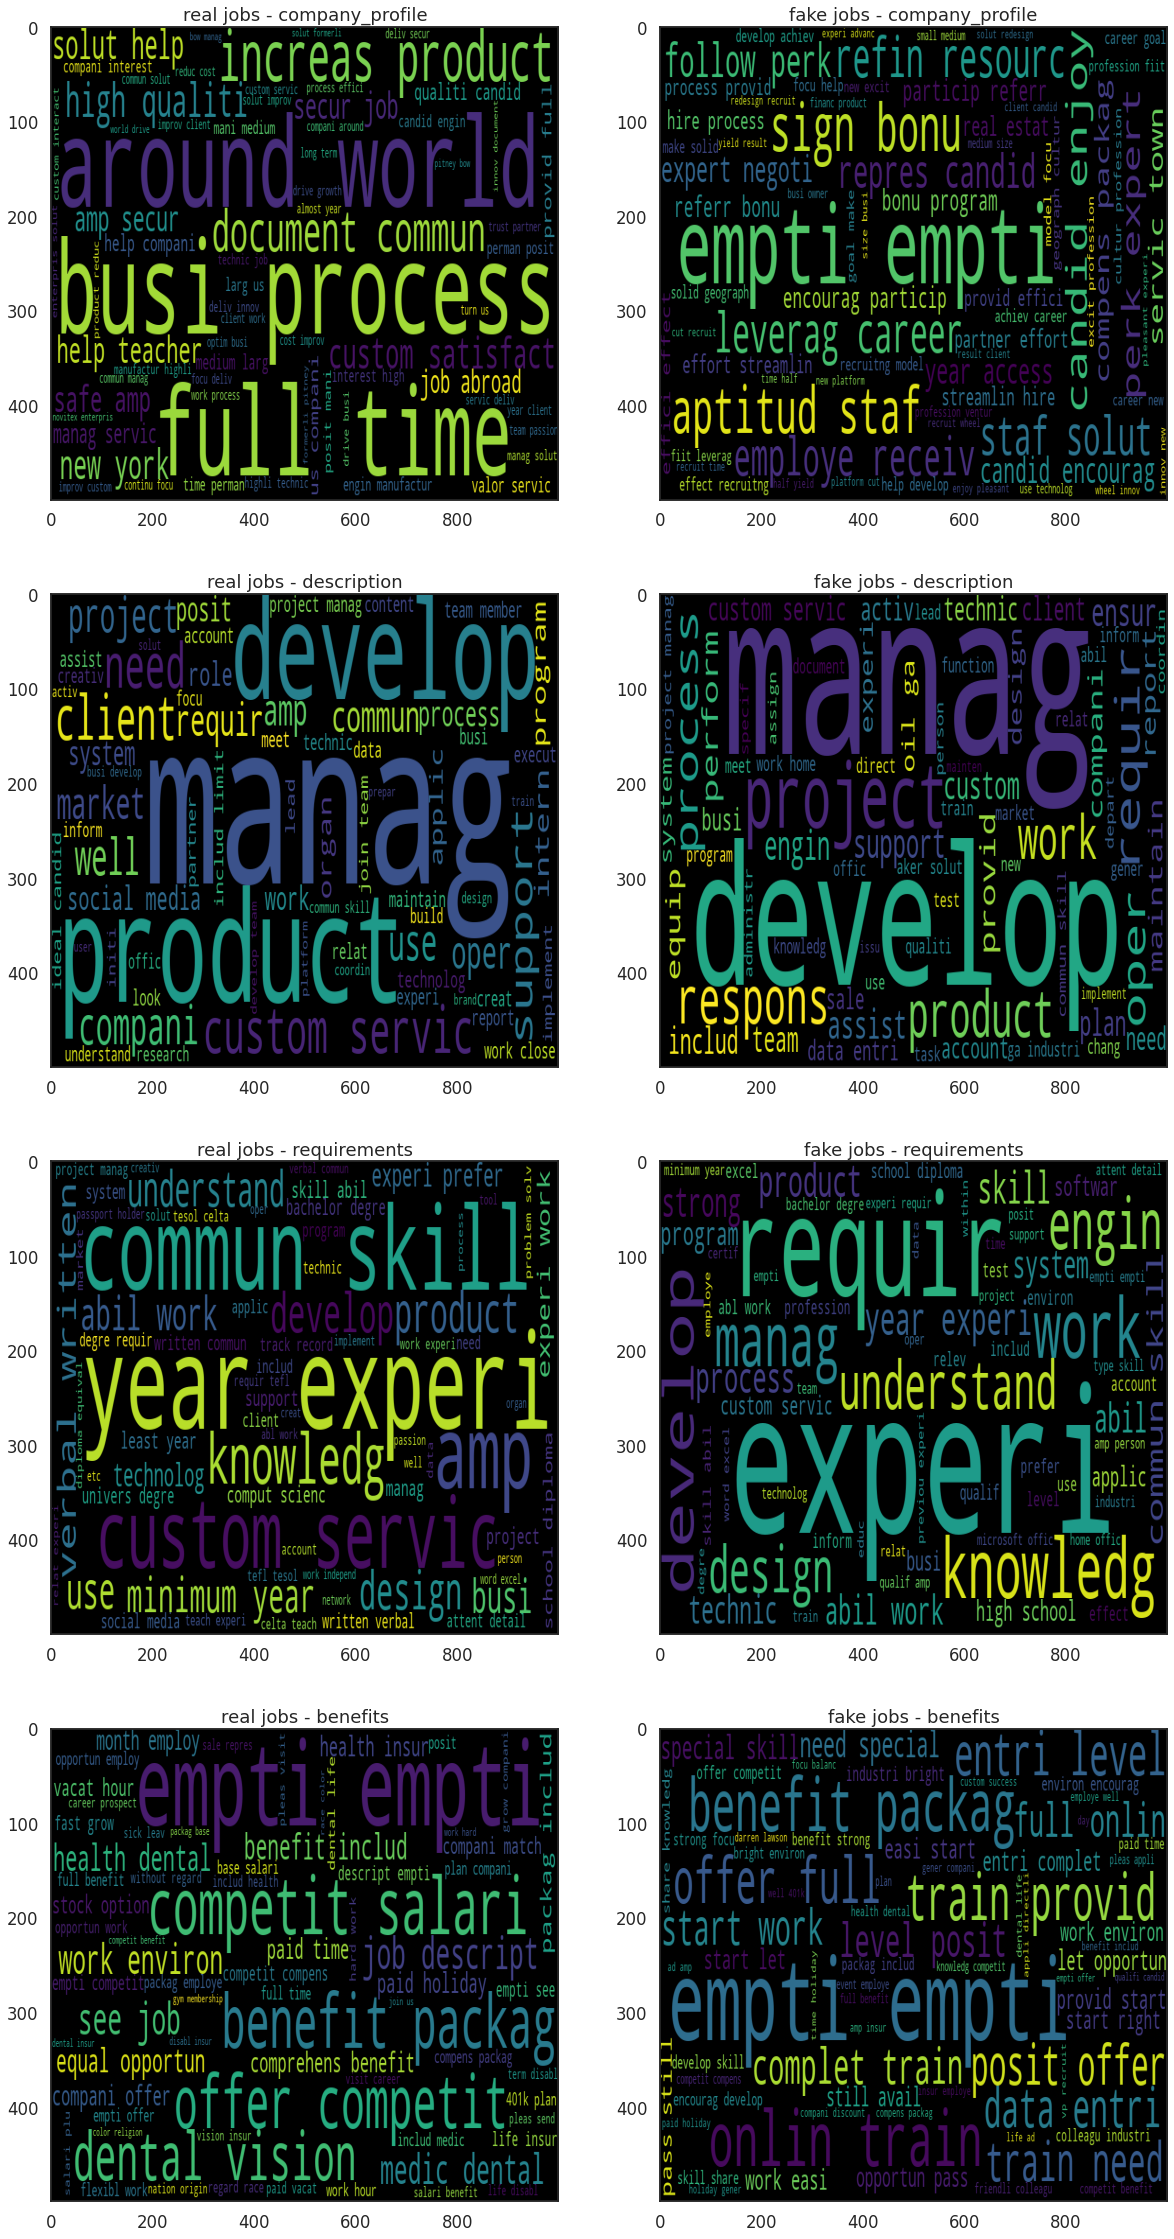

In [32]:
plt.figure(figsize=(20,40))

for i in range(len(string_labels)):
  wc_real= WordCloud(max_words=70, width = 1000 , height = 500,min_font_size=10,background_color='black').generate(new_strings_real[string_labels[i]].str.cat(sep=" "))
  wc_fake= WordCloud(max_words=70, width=1000,height=500,min_font_size=10,background_color='black').generate(new_strings_fake[string_labels[i]].str.cat(sep=" "))


  plt.subplot(4, 2, (2*i+1)) # 4 rows, 2 cols, index 1
  plt.title("real jobs - " + string_labels[i])
  plt.imshow(wc_real, aspect='auto')

  plt.subplot(4,2,2*(i+1))
  plt.title("fake jobs - " + string_labels[i])
  plt.imshow(wc_fake, aspect='auto')

We chcked for each text attribute for the most 70 frequency appearnt words. We compared them and hoped to find that specific words appeared much more in only fake jobs or only real jobs. However, it is not apparent that any keywords can separate real jobs and fake jobs, as most common words such as "work", "experience", "service" and "skill" are featured in both classes of text.But it is noticeable that the word "Empty" for missing values is featured high in the most common words list in fake ads. And it is sharpens the conclusion we've reached befor - ***Fake job scammers writes less textual content!***

# **MODELS BUILDING**

🙂

In [21]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import time

In [22]:
le = preprocessing.LabelEncoder()
#ASSIGNS NUMBER TO EVERY LABEL
for i in data_balanced.columns:
    le.fit(data_balanced[i])
    data_balanced[i]=le.transform(data_balanced[i])

In [23]:
X=data_balanced.drop(['fraudulent'],axis=1)
Y=data_balanced["fraudulent"]
X_train,X_test,Y_train,Y_test = (train_test_split(X, Y, test_size=0.25, shuffle=True))

In [24]:
# the same for imbalanced data
X1=data1.drop(['fraudulent'],axis=1)
Y1=data1["fraudulent"]
X1_train,X1_test,Y1_train,Y1_test = (train_test_split(X1, Y1, test_size=0.25, shuffle=True))

At first, We start with the Lazy Learning Model - **KNN**
📨

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

l = []

ks = [3, 5, 7, 11, 15, 23, 45, 101]

# scaling the data
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data_balanced), columns=data_balanced.columns)

for k in ks:
  
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(X_train, Y_train)

  y_pred = knn.predict(X_test)

  stored_accouracy = metrics.accuracy_score(Y_test, y_pred)
  accuracy_train = knn.score(X_train, Y_train)
  precision = metrics.precision_score(Y_test, y_pred)
  recall = metrics.recall_score(Y_test, y_pred)
  f1_score = metrics.f1_score(Y_test, y_pred)

  l.append((k,stored_accouracy,accuracy_train,precision,recall,f1_score))

l_dp = pd.DataFrame(l,columns=['k', 'Accuracy', 'Precision', 'recall', 'F1-Score', 'accuracy_train' ])

l_dp






k  Accuracy  Precision    recall  F1-Score  accuracy_train
0    3  0.963547   0.982399  0.931567  1.000000        0.964571
1    5  0.949906   0.966131  0.908308  1.000000        0.951951
2    7  0.933561   0.951352  0.881923  1.000000        0.937257
3   11  0.906985   0.924030  0.842147  1.000000        0.914310
4   15  0.883467   0.900039  0.810899  0.997867        0.894720
5   23  0.837135   0.857115  0.770670  0.956398        0.853548
6   45  0.808325   0.805841  0.769007  0.877251        0.819571
7  101  0.751176   0.755939  0.728299  0.795261        0.760308

✌
We have the best restult for k = 3 and k = 5.


---



The same for the imbalanced DataSet, in order to later compare the results.

In [28]:

l = []

ks = [1, 3, 5, 7, 9, 11, 15, 23, 45, 101] # this imbalanced dataset is smaller, so k should be smaller

# scaling the data
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

for k in ks:
  
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn.fit(X1_train, Y1_train)

  y1_pred = knn.predict(X1_test)

  stored_accouracy = metrics.accuracy_score(Y1_test, y1_pred)
  accuracy_train = knn.score(X1_train, Y1_train)
  precision = metrics.precision_score(Y1_test, y1_pred)
  recall = metrics.recall_score(Y1_test, y1_pred)
  f1_score = metrics.f1_score(Y1_test, y1_pred)

  l.append((k,stored_accouracy,accuracy_train,precision,recall,f1_score))

l_dp = pd.DataFrame(l,columns=['k', 'Accuracy', 'Precision', 'recall', 'F1-Score', 'accuracy_train' ])

l_dp


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


k  Accuracy  Precision    recall  F1-Score  accuracy_train
0    1  0.942506   1.000000  0.412698  0.488263        0.447312
1    3  0.956152   0.969724  0.561151  0.366197        0.443182
2    5  0.959732   0.963908  0.663366  0.314554        0.426752
3    7  0.958837   0.962192  0.674699  0.262911        0.378378
4    9  0.959955   0.958389  0.750000  0.239437        0.362989
5   11  0.958613   0.957271  0.694444  0.234742        0.350877
6   15  0.958389   0.955779  0.754717  0.187793        0.300752
7   23  0.957718   0.954437  0.785714  0.154930        0.258824
8   45  0.953244   0.951902  0.700000  0.032864        0.062780
9  101  0.952349   0.951305  0.000000  0.000000        0.000000

We can see here that accuracy is high, but train accuracy is quite low.
Also we can notice that accuracy is almost not changed for different k values.
We conclude that KNN model is not suitable for Imbalanced Dataset, so we should try other models.

*In order to simplify the process, we call the traintest function on each model, and examine the results.*

In [32]:
'''FUNCTION TO TRAIN THE MODEL, PREDICT THE LABELS FOR TEST SAMPLES AND CALCULATE THE ACCURACY, PRECISION,
    RECALL, F1-SCORE AND CONFUSION MATRIX FOR EACH MODEL'''

def traintest(model,modelname, data):

    start = time.time()
    X=data.drop(['fraudulent'],axis=1)
    Y=data["fraudulent"]
    X_train,X_test,Y_train,Y_test = (train_test_split(X, Y, test_size=0.25, shuffle=True))
    
    
    print("\n------------------\nMODEL - "+ modelname + "\n-----------------\n")

    #Training the model
    model.fit(X_train, Y_train) 

    #Predicting 
    Y_pred = model.predict(X_test)

    #Calculating the accuracy
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print("Accuracy = " + '{:.2f}%'.format(accuracy*100))
    
    #accuracy of the train to avoid overfitting
    accuracy_train = model.score(X_train, Y_train)
    print("Accuracy of the train = " + '{:.2f}%'.format(accuracy_train*100))

    #Calculating the precision
    precision = metrics.precision_score(Y_test, Y_pred)
    print("Precision = " + '{:.2f}%'.format(precision*100))

    #recall
    recall = metrics.recall_score(Y_test, Y_pred)
    print("recall = " + '{:.2f}%'.format(recall*100))

    #f1-score:
    f1_score = metrics.f1_score(Y_test, Y_pred)
    print("f1-score = " + '{:.2f}%'.format(f1_score*100))

    #Total Time
    end = time.time() - start
    print("Time = " + '{:.2f}s'.format(end))

    #Cross validation
    result = model_selection.cross_val_score(model, X_train, Y_train, cv=7, scoring = 'accuracy')

    print("Confusion matrix:")
    confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

    return result

The models on the Balanced DataSet:


------------------
MODEL - NAIVE BAYES
-----------------

Accuracy = 79.21%
Accuracy of the train = 78.11%
Precision = 79.90%
recall = 78.40%
f1-score = 79.14%
Time = 0.12s
Confusion matrix:


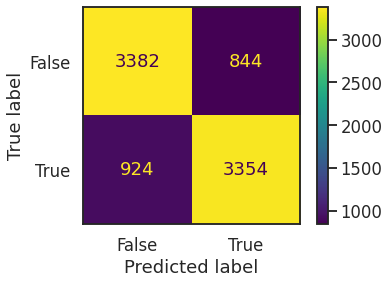


------------------
MODEL - DECISION TREE
-----------------

Accuracy = 98.74%
Accuracy of the train = 100.00%
Precision = 97.54%
recall = 100.00%
f1-score = 98.75%
Time = 0.21s
Confusion matrix:


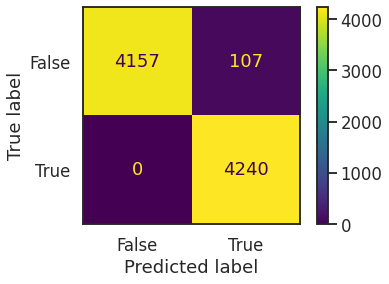


------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 99.76%
Accuracy of the train = 100.00%
Precision = 99.53%
recall = 100.00%
f1-score = 99.77%
Time = 3.80s
Confusion matrix:


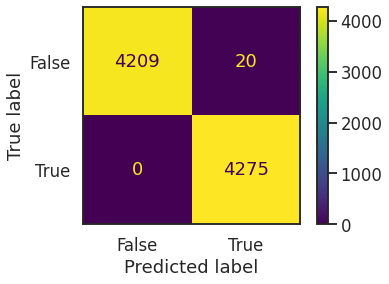


------------------
MODEL - SVM
-----------------

Accuracy = 74.92%
Accuracy of the train = 75.05%
Precision = 71.51%
recall = 82.89%
f1-score = 76.78%
Time = 87.20s
Confusion matrix:


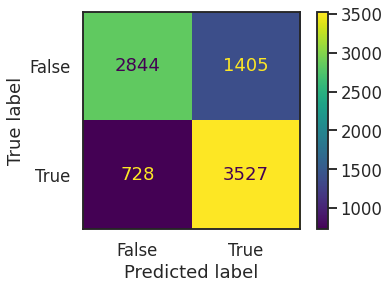


------------------
MODEL - LOGISITC REGRESSION
-----------------

Accuracy = 80.02%
Accuracy of the train = 80.05%
Precision = 79.43%
recall = 81.24%
f1-score = 80.32%
Time = 0.72s
Confusion matrix:


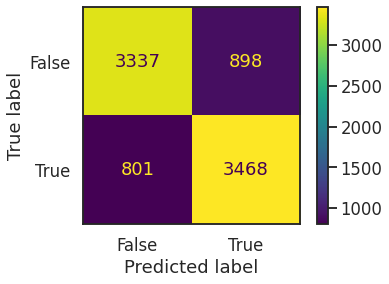

array([0.80027435, 0.7920439 , 0.80049396, 0.80378705, 0.80159166,
       0.79884742, 0.80049396])

In [36]:
# calling the function on the modesl, but on the Balanced Dataset
traintest(GaussianNB(),"NAIVE BAYES", data_balanced)
traintest(DecisionTreeClassifier(),"DECISION TREE",data_balanced)
traintest(RandomForestClassifier(),"RANDOM FOREST", data_balanced)
traintest(SVC(),"SVM", data_balanced)
traintest(LogisticRegression(solver='liblinear'),"LOGISITC REGRESSION", data_balanced)

The models on the Imbalanced DataSet


------------------
MODEL - NAIVE BAYES
-----------------

Accuracy = 93.71%
Accuracy of the train = 93.50%
Precision = 32.69%
recall = 32.54%
f1-score = 32.61%
Time = 0.05s
Confusion matrix:


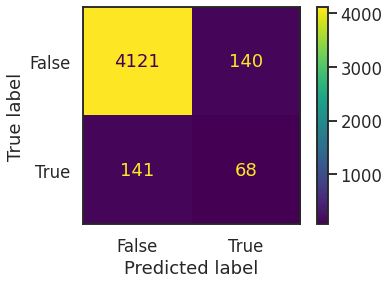


------------------
MODEL - DECISION TREE
-----------------

Accuracy = 96.80%
Accuracy of the train = 100.00%
Precision = 67.56%
recall = 68.47%
f1-score = 68.01%
Time = 0.16s
Confusion matrix:


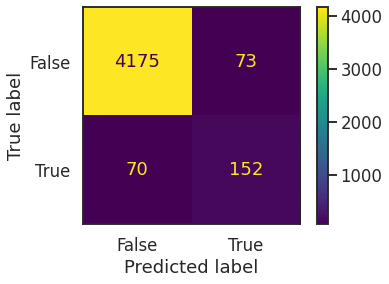


------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 98.32%
Accuracy of the train = 100.00%
Precision = 94.97%
recall = 69.27%
f1-score = 80.11%
Time = 2.49s
Confusion matrix:


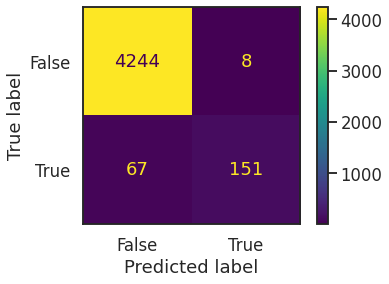


------------------
MODEL - SVM
-----------------

Accuracy = 95.10%
Accuracy of the train = 95.18%
Precision = 0.00%
recall = 0.00%
f1-score = 0.00%
Time = 4.25s
Confusion matrix:


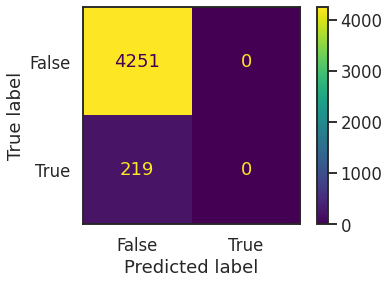


------------------
MODEL - LOGISITC REGRESSION
-----------------

Accuracy = 95.57%
Accuracy of the train = 95.26%
Precision = 70.59%
recall = 5.85%
f1-score = 10.81%
Time = 0.29s
Confusion matrix:


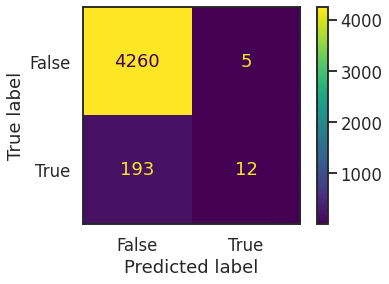

array([0.94989562, 0.95615866, 0.95407098, 0.95250522, 0.9519833 ,
       0.95143603, 0.94986945])

In [35]:
# calling the traintest function on the models
import warnings
warnings.filterwarnings('ignore')  

traintest(GaussianNB(),"NAIVE BAYES", data1)
traintest(DecisionTreeClassifier(),"DECISION TREE",data1)
traintest(RandomForestClassifier(),"RANDOM FOREST", data1)
traintest(SVC(),"SVM", data1)
traintest(LogisticRegression(solver='liblinear'),"LOGISITC REGRESSION", data1)



---

After applying the models on both (Imbalanced and Balanced) Datasets, and comparing the results, we noticed that: \
1. Accuracy is much higher in all **models**. \
2. Precision, Recall and F1-score are **much lower** in all models. \
3. Accuracy of train (overfitting) is **much higher** in all models.\

**Our conclusion:** There is a sensitivity in the balance that the models seem to miss in the imbalanced dataset, and thus creating great accuracy , but poor precision (and f1-score) on the test. Concerning the low recall, it can be explained that we have a high number of false negative because od the imbalanced dataset. Therefore, we focus from now on the Balanced Dataset' models.





---

Accuracy of train = 100% ! \

We can clearly see we have overfitting problem for decision tree and random forest. In order to solve it, we should minimize their depth.


------------------
Decision Tree for depth: 5.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 87.79%
Accuracy of the train = 87.99%
Precision = 84.53%
recall = 92.27%
f1-score = 88.23%
Time = 0.10s
Confusion matrix:


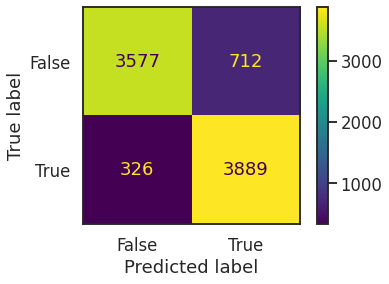


------------------
Random Forest for depth: 5.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 89.24%
Accuracy of the train = 90.11%
Precision = 88.00%
recall = 90.65%
f1-score = 89.31%
Time = 1.88s
Confusion matrix:


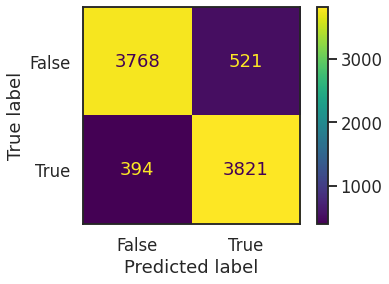


------------------
Decision Tree for depth: 7.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 91.82%
Accuracy of the train = 92.23%
Precision = 89.00%
recall = 95.26%
f1-score = 92.02%
Time = 0.13s
Confusion matrix:


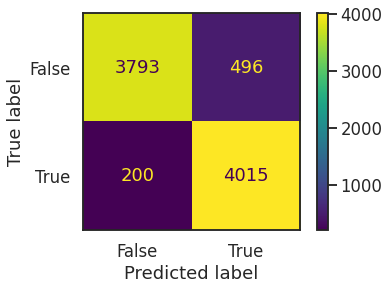


------------------
Random Forest for depth: 7.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 94.05%
Accuracy of the train = 94.36%
Precision = 91.70%
recall = 96.75%
f1-score = 94.16%
Time = 2.35s
Confusion matrix:


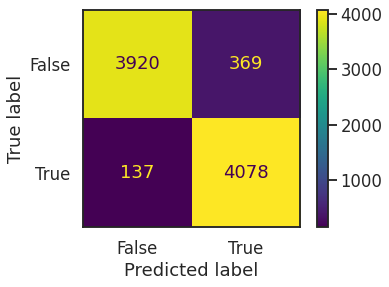


------------------
Decision Tree for depth: 9.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 94.51%
Accuracy of the train = 95.05%
Precision = 91.22%
recall = 98.39%
f1-score = 94.67%
Time = 0.14s
Confusion matrix:


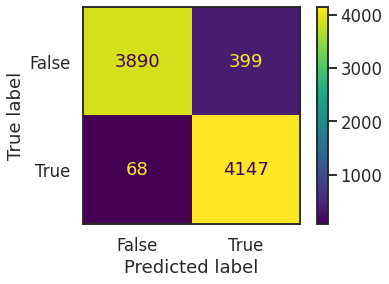


------------------
Random Forest for depth: 9.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 96.00%
Accuracy of the train = 96.47%
Precision = 93.90%
recall = 98.32%
f1-score = 96.06%
Time = 2.62s
Confusion matrix:


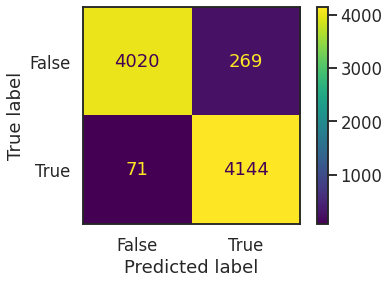


------------------
Decision Tree for depth: 15.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 97.52%
Accuracy of the train = 98.38%
Precision = 95.23%
recall = 100.00%
f1-score = 97.56%
Time = 0.17s
Confusion matrix:


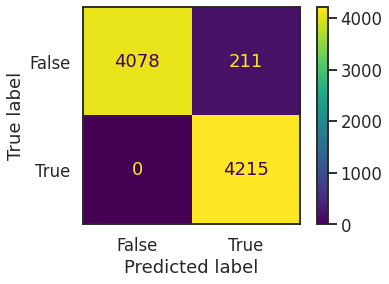


------------------
Random Forest for depth: 15.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 98.45%
Accuracy of the train = 99.09%
Precision = 96.96%
recall = 100.00%
f1-score = 98.46%
Time = 3.21s
Confusion matrix:


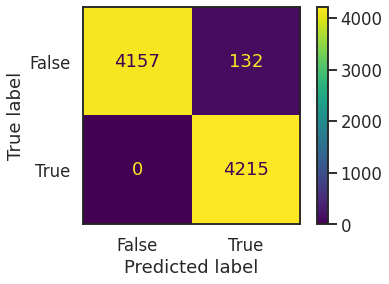


------------------
Decision Tree for depth: 19.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 98.19%
Accuracy of the train = 99.16%
Precision = 96.48%
recall = 100.00%
f1-score = 98.21%
Time = 0.19s
Confusion matrix:


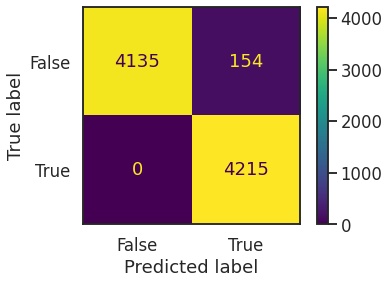


------------------
Random Forest for depth: 19.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 98.99%
Accuracy of the train = 99.52%
Precision = 98.00%
recall = 100.00%
f1-score = 98.99%
Time = 3.29s
Confusion matrix:


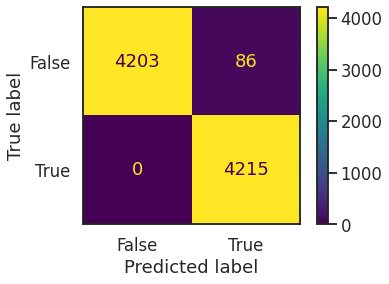


------------------
Decision Tree for depth: 21.00

------------------
MODEL - DECISION TREE
-----------------

Accuracy = 98.40%
Accuracy of the train = 99.40%
Precision = 96.87%
recall = 100.00%
f1-score = 98.41%
Time = 0.26s
Confusion matrix:


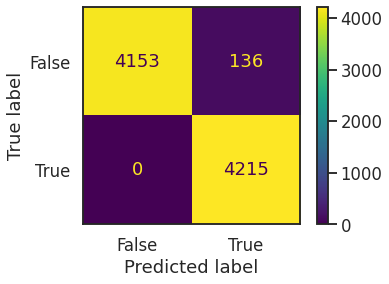


------------------
Random Forest for depth: 21.00

------------------
MODEL - RANDOM FOREST
-----------------

Accuracy = 99.13%
Accuracy of the train = 99.71%
Precision = 98.27%
recall = 100.00%
f1-score = 99.13%
Time = 4.41s
Confusion matrix:


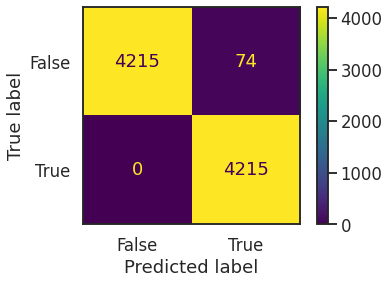

In [ ]:
tree_depth = [5, 7, 9, 15, 19, 21]

for d in tree_depth:
  print("\n------------------\nDecision Tree for depth: " +'{:.2f}'.format(d))
  traintest(DecisionTreeClassifier(max_depth=d,random_state=42),"DECISION TREE", data_balanced)
  print("\n------------------\nRandom Forest for depth: " +'{:.2f}'.format(d))
  traintest(RandomForestClassifier(max_depth=d),"RANDOM FOREST", data_balanced)








---


### *In our opinion, The best results are for Decision Tree of depth 9, and Random Forest of depth 7* 😃


---



## ***Visualization of the tree***  🌲


In [ ]:
try:
    import pydotplus
    pydotplus_installed = True
    
except:
    print('PyDotPlus must be installed to execute the remainder of the cells associated with this question.')
    print('Please see the instructions for this question for details.')
    pydotplus_installed = False

In [ ]:
from io import StringIO
from IPython.display import Image, display
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(max_depth=9,random_state=42)
dt = dt.fit(X_train, Y_train)

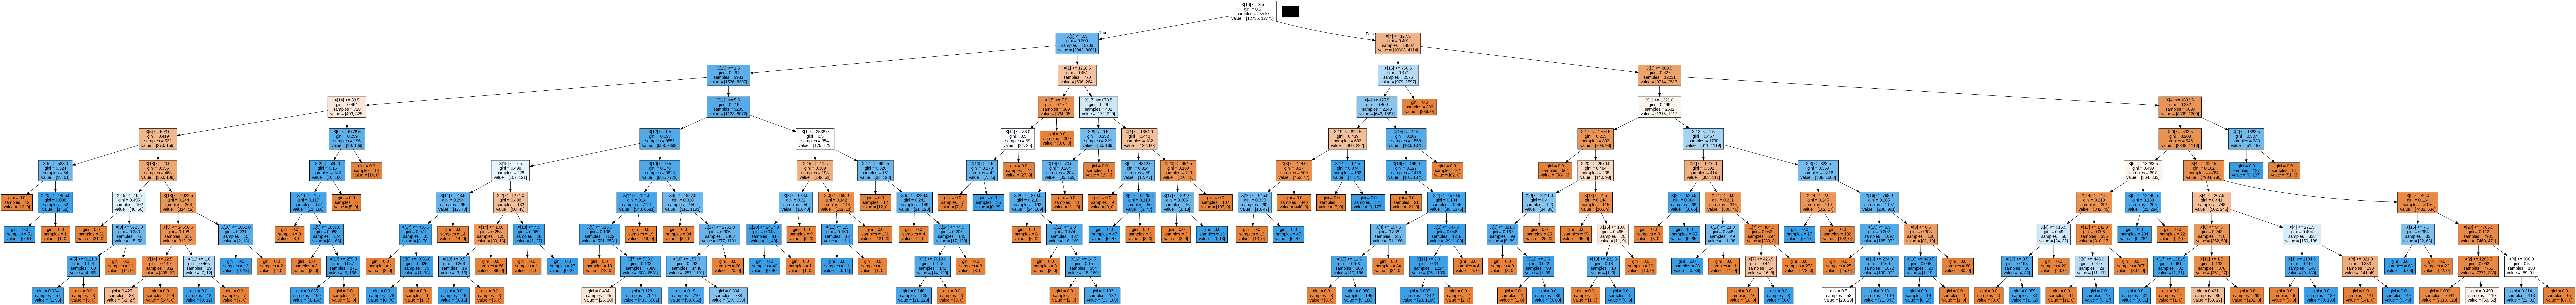

In [ ]:
if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'fake_false_DT.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

The Decision Tree we chose has depth = 9.

⭐⭐⭐


# **Conclusions!**

The best models for our dataset are the random forest, decision tree and KNN models. They showed great results with accuracy of 94.05%, 94.51% and 94.94% (respectively) without being overfitted. Each model has its own advantages and disadvantages, so it's hard to choose which one is the best. For our specific needs, we tend to prefer 
the Decision Tree model because it's easier to illustrate to others and much more "representable" than the random forest.